# **Exploratory Data Analysis**

### **Table of Contents**

1. **Introduction**
   - Overview of the Dataset
   - Objectives of the Analysis

2. **Data Cleaning and Preprocessing**
   - Removing Unnecessary Columns
   - Rename Certain Columns
   - Data Type Conversions
   - Handling Missing Values
   - Remove Duplicated Row
   - Remove Outliers

3. **Estimates of Location and Dispersion**
   - Summary Statistics for Key Variables

4. **Correlation Analysis**
   - Correlation Matrix for Numerical Variables
   - Scatter Plots to Explore Bivariate Relationships

5. **Segmented Analysis**
   - Analysis by Car Make
   - Analysis by Year

6. **Trend Analysis Over Time**
   - Trends in Engine Power
   - Trends in Fuel Efficiency
   - Pricing Trends Across Years






### **1. Introduction**

   - **Overview of the Dataset**
   
     This dataset comprises detailed information on various car models available in the market, including attributes like price, make, model year, engine horsepower, fuel type, and miles per gallon (MPG) in both city and highway driving conditions. The dataset covers a wide range of car manufacturers, providing a comprehensive overview of the automotive landscape.
   - **Objectives of the Analysis**
   
     The primary objective of this analysis is to explore and understand the relationships between different vehicle characteristics and their impact on car pricing. By examining trends and patterns within this data, we aim to identify key factors that influence vehicle pricing and performance. Additionally, the analysis seeks to provide actionable insights that can help stakeholders make informed decisions, whether for targeted marketing, pricing strategies, or product development in the automotive industry.

### **2. Data Cleaning and Preprocessing**

In [1]:
# import required libraries
import pandas as pd
import numpy as np
from statistics import median, mode
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the data
df = pd.read_csv("Cars.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


#### **2.1 Removing Unnecesarry Columns**

In [4]:
# Remove unnecesarry columns
df = df.drop(['Engine Fuel Type', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size', 'Market Category'], axis=1)
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


#### **2.2 Raname Certain Columns**

In [5]:
df = df.rename(columns={'highway MPG': 'Highway MPG', 'city mpg': 'City MPG', 'MSRP': 'Price'})
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Highway MPG,City MPG,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


#### **2.3 Data Type Conversions**

In [6]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Highway MPG            int64
City MPG               int64
Price                  int64
dtype: object

In [7]:
# Convert "Year" to categorical
df[["Year"]] = df[["Year"]].astype("category")

# Convert numeric data stored as object to float or int
df["Engine HP"] = pd.to_numeric(df["Engine HP"], errors="coerce")
df['Engine Cylinders'] = pd.to_numeric(df['Engine Cylinders'], errors='coerce')

# Convert categorical data to category type
df['Transmission Type'] = df['Transmission Type'].astype('category')
df['Driven_Wheels'] = df['Driven_Wheels'].astype('category')


In [8]:
# Confirm data type conversion
df.dtypes

Make                   object
Model                  object
Year                 category
Engine HP             float64
Engine Cylinders      float64
Transmission Type    category
Driven_Wheels        category
Highway MPG             int64
City MPG                int64
Price                   int64
dtype: object

#### **2.4 Handling missing values**

In [9]:
# Chack for missing values
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Highway MPG           0
City MPG              0
Price                 0
dtype: int64

In [10]:
# Handle missing values
df["Engine HP"] = df["Engine HP"].fillna(median(df["Engine HP"]))
df["Engine Cylinders"] = df["Engine Cylinders"].fillna(median(df["Engine Cylinders"]))

In [11]:
# Confirm handling of missing values
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Highway MPG          0
City MPG             0
Price                0
dtype: int64

#### **2.5 Remove Duplicate Rows**

In [12]:
# check for number of rows and columns
df.shape

(11914, 10)

In [13]:
# Check for duplicate rows
duplicate = df.duplicated().sum()
duplicate

989

In [14]:
# Remove duplicates rows
df = df.drop_duplicates()
df.shape

(10925, 10)

#### **2.6 Remove Outliers**

##### **2.6.1 Box Plots to Identify Outliers**

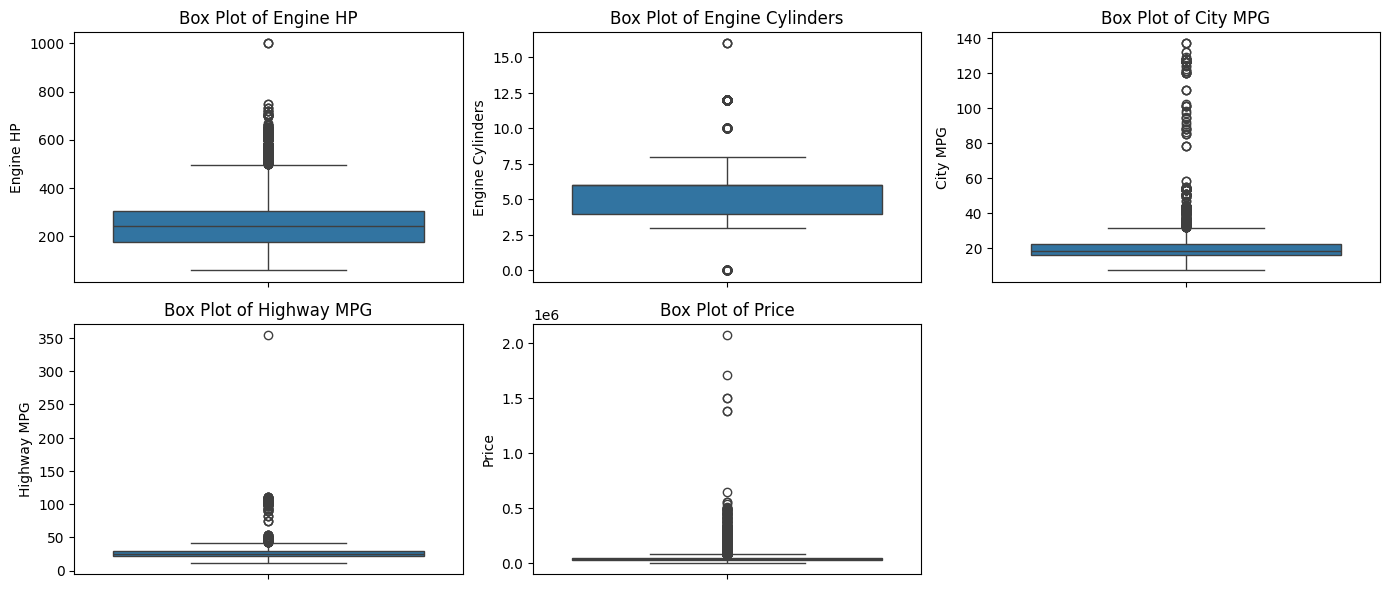

In [15]:
# check for outliers
plt.figure(figsize=(14,6))

plt.subplot(2,3,1)
sns.boxplot(df['Engine HP'])
plt.title('Box Plot of Engine HP')

plt.subplot(2,3,2)
sns.boxplot(df['Engine Cylinders'])
plt.title('Box Plot of Engine Cylinders')

plt.subplot(2,3,3)
sns.boxplot(df['City MPG'])
plt.title('Box Plot of City MPG')

plt.subplot(2,3,4)
sns.boxplot(df['Highway MPG'])
plt.title('Box Plot of Highway MPG')

plt.subplot(2,3,5)
sns.boxplot(df['Price'])
plt.title('Box Plot of Price')

plt.tight_layout()
plt.show()

In [16]:
# Calculate Q1, Q3, and IQR only for specific columns
columns = ['Price', 'Engine HP', 'Engine Cylinders', 'City MPG', 'Highway MPG']
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Apply outlier filtering only to these columns
df = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape


(9616, 10)

##### **2.6.2 Histograms for the Distribution of Continuous Variables**

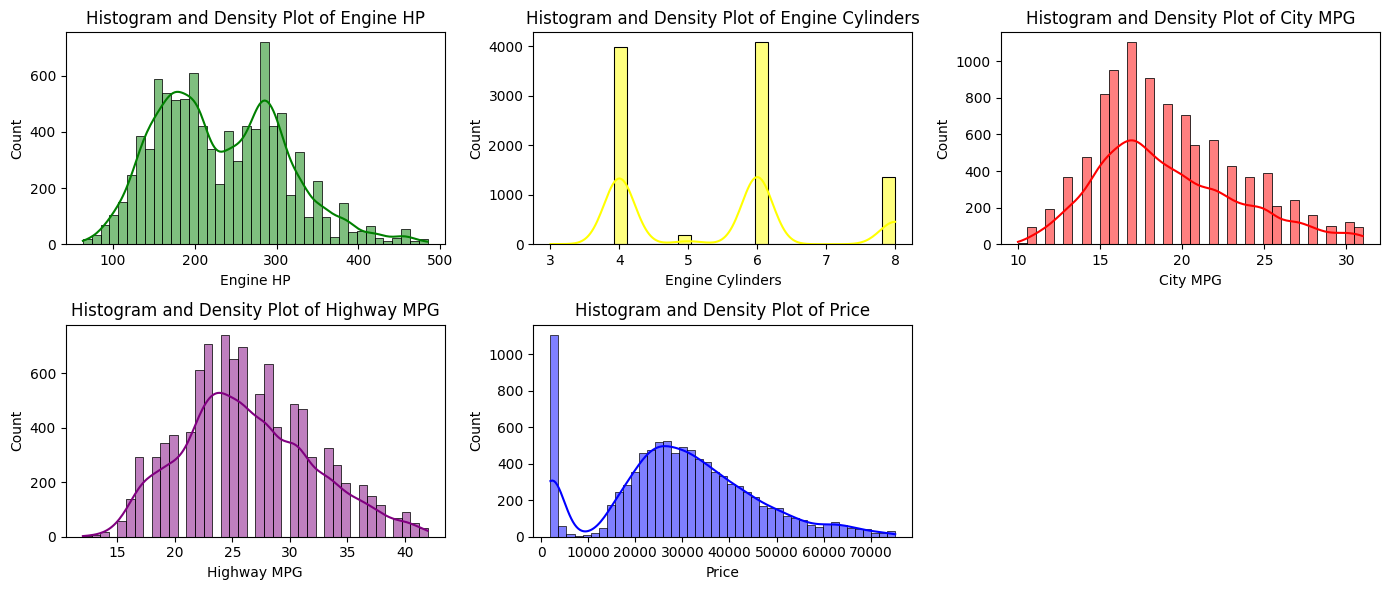

In [17]:
# Set up the visualization layout
plt.figure(figsize = (14,6 ))

# Histogram with Density Plots

plt.subplot(2,3,1)
sns.histplot(df['Engine HP'], kde = True, color="green")
plt.title('Histogram and Density Plot of Engine HP')

plt.subplot(2,3,2)
sns.histplot(df['Engine Cylinders'], kde =True, color="yellow")
plt.title('Histogram and Density Plot of Engine Cylinders')

plt.subplot(2,3,3)
sns.histplot(df['City MPG'], kde = True, color="red")
plt.title('Histogram and Density Plot of City MPG')

plt.subplot(2,3,4)
sns.histplot(df['Highway MPG'], kde = True, color="purple")
plt.title('Histogram and Density Plot of Highway MPG')

plt.subplot(2,3,5)
sns.histplot(df['Price'], kde = True, color = 'blue')
plt.title('Histogram and Density Plot of Price')

plt.tight_layout()
plt.show()


### **3. Estimate of Location and Dispersion**

#### **3.1 Summary Statistics for Key Variables**

In [18]:
df[['Price', 'Engine HP', 'Engine Cylinders', 'City MPG', 'Highway MPG']].describe()

,Price,Engine HP,Engine Cylinders,City MPG,Highway MPG
count,9616.000000,9616.000000,9616.000000,9616.000000,9616.000000
mean,29831.042949,233.133423,5.431572,19.179597,26.315412
std,15727.356181,77.823862,1.389395,4.359947,5.714315
min,2000.000000,63.000000,3.000000,10.000000,12.000000
25%,20998.000000,170.000000,4.000000,16.000000,22.000000
50%,29352.500000,225.000000,6.000000,18.000000,26.000000
75%,39250.000000,288.000000,6.000000,22.000000,30.000000
max,75200.000000,485.000000,8.000000,31.000000,42.000000


### **4. Correlation Analysis**

In [19]:
# Calculate correlation matrix
corr_matrix = df[['Engine HP', 'Engine Cylinders', 'City MPG', 'Highway MPG', 'Price']].corr()
corr_matrix

,Engine HP,Engine Cylinders,City MPG,Highway MPG,Price
Engine HP,1.000000,0.698970,-0.518785,-0.417176,0.739159
Engine Cylinders,0.698970,1.000000,-0.751061,-0.698213,0.328367
City MPG,-0.518785,-0.751061,1.000000,0.939120,-0.139703
Highway MPG,-0.417176,-0.698213,0.939120,1.000000,-0.064400
Price,0.739159,0.328367,-0.139703,-0.064400,1.000000


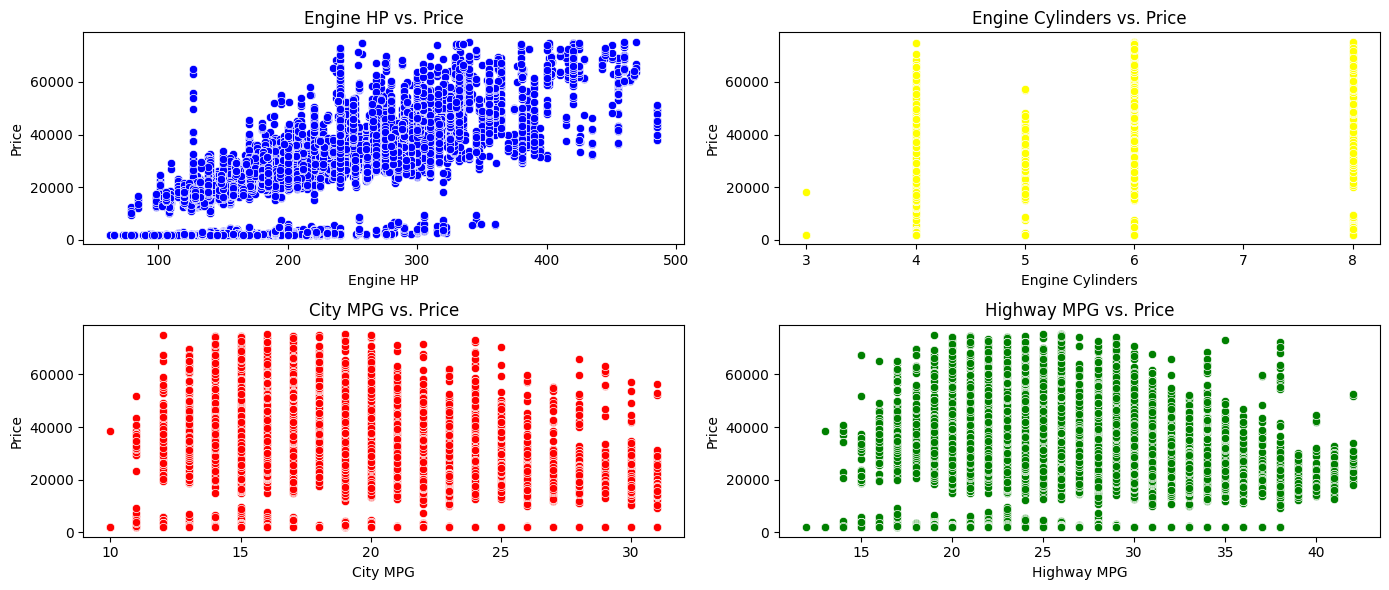

In [20]:
# Setting up the plotting area
plt.figure(figsize=(14, 6))

# Engine HP vs. Price
plt.subplot(2, 2, 1)  # 2 row, 2 columns, 1st subplot
sns.scatterplot(x='Engine HP', y='Price', data=df, color='blue')
plt.title('Engine HP vs. Price')

# Engine Cylinders vs. Price
plt.subplot(2, 2, 2)  # 2 row, 2 columns, 2nd subplot
sns.scatterplot(x='Engine Cylinders', y='Price', data=df, color='yellow')
plt.title('Engine Cylinders vs. Price')

# City MPG vs. Price
plt.subplot(2, 2, 3)  # 1 row, 3 columns, 3rd subplot
sns.scatterplot(x='City MPG', y='Price', data=df, color='red')
plt.title('City MPG vs. Price')

# Highway MPG vs. Price
plt.subplot(2, 2, 4)  # 1 row, 3 columns, 4th subplot
sns.scatterplot(x='Highway MPG', y='Price', data=df, color='green')
plt.title('Highway MPG vs. Price')

# Display the plots
plt.tight_layout()
plt.show()

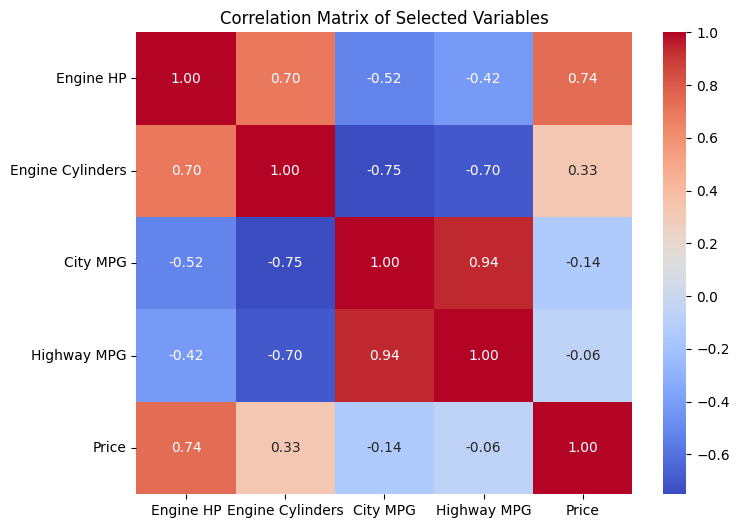

In [21]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Selected Variables')
plt.show()

### **5. Segmented Analysis**

In [22]:
# Analysis by Car Make
make_summary = df.groupby('Make').agg({
    'Price':'mean',
    'Engine HP':'mean',
    'City MPG':'mean',
    'Highway MPG':'mean',}).sort_values(by='Price', ascending = False)
make_summary.head()

,Price,Engine HP,City MPG,Highway MPG
Make,,,,
Maserati,71000.000000,345.000000,15.750000,23.250000
Lotus,61717.750000,238.650000,19.600000,26.250000
Alfa Romeo,61600.000000,237.000000,24.000000,34.000000
Cadillac,48742.387622,307.879479,17.947883,26.312704
BMW,48111.880734,287.036697,20.215596,29.472477


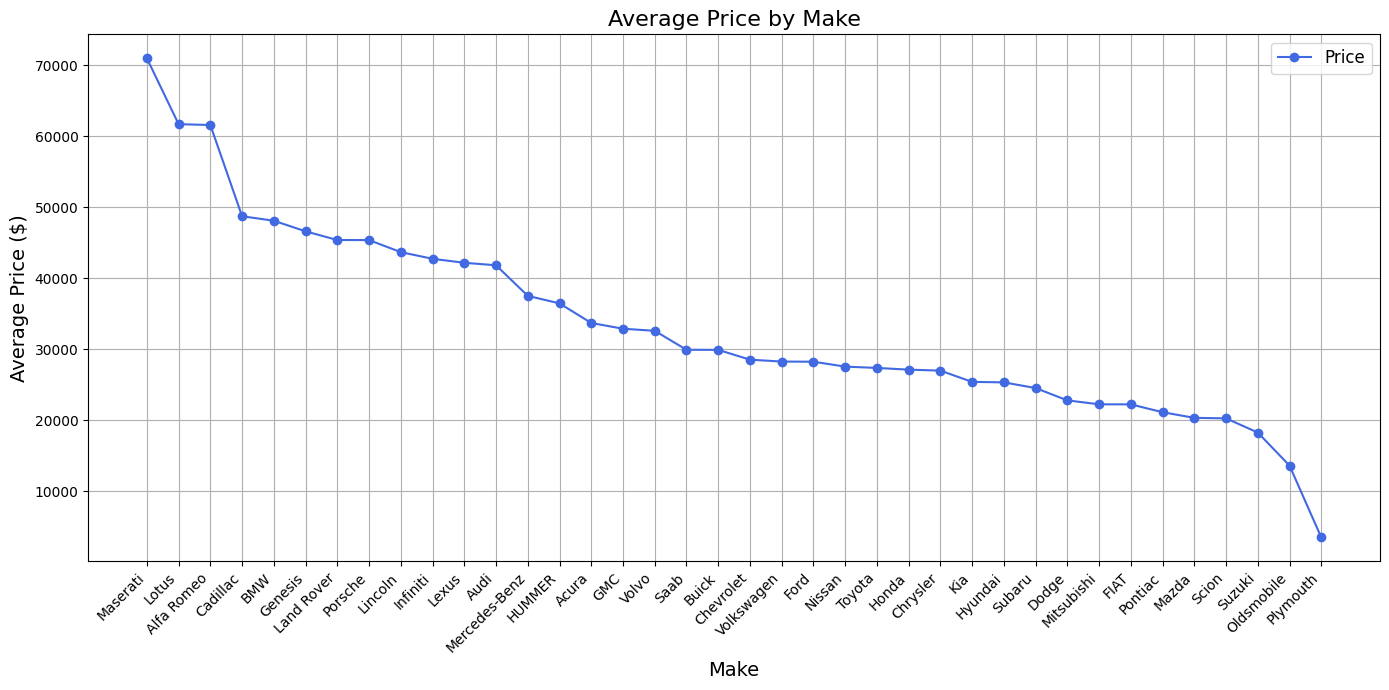

In [23]:


plt.figure(figsize=(14, 7)) 
plt.plot(make_summary.index, make_summary['Price'], marker='o', linestyle='-', color='royalblue')  

# Adding title and labels with increased font sizes for clarity
plt.title('Average Price by Make', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better legibility
plt.grid(True)  # Include grid for easier interpretation
plt.legend(['Price'], fontsize=12)  # Ensure the legend is clearly labeled

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


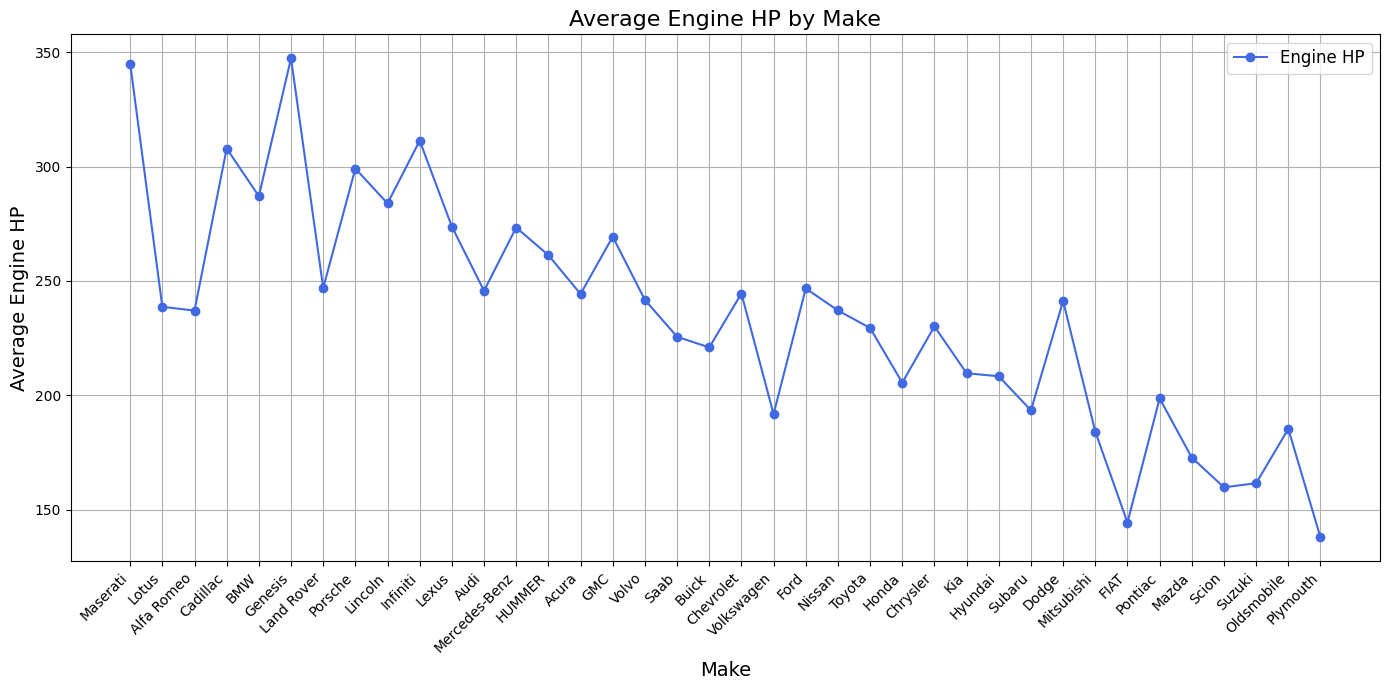

In [24]:

plt.figure(figsize=(14, 7))  # Setting a larger figure size for better readability
plt.plot(make_summary.index, make_summary['Engine HP'], marker='o', linestyle='-', color='royalblue')  # Adding markers for each data point

# Adding title and labels with increased font sizes for clarity
plt.title('Average Engine HP by Make', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Average Engine HP', fontsize=14)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better legibility
plt.grid(True)  # Include grid for easier interpretation
plt.legend(['Engine HP'], fontsize=12)  # Ensure the legend is clearly labeled

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


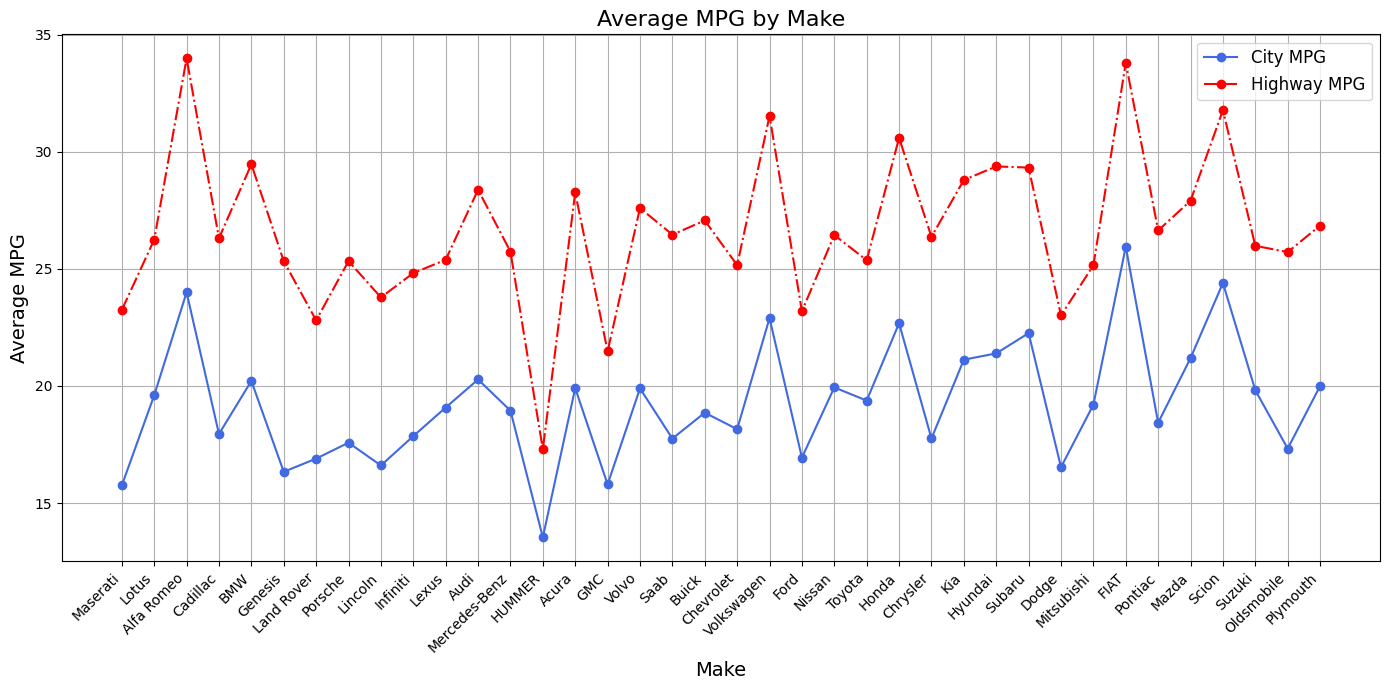

In [25]:

plt.figure(figsize=(14, 7))
# Plotting City MPG
plt.plot(make_summary.index, make_summary['City MPG'], marker='o', linestyle='-', color='royalblue', label='City MPG')
# Plotting Highway MPG
plt.plot(make_summary.index, make_summary['Highway MPG'], marker='o', linestyle='-.', color='red', label='Highway MPG')

# Adding title and labels with increased font sizes for clarity
plt.title('Average MPG by Make', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Average MPG', fontsize=14)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better legibility
plt.grid(True)  # Include grid for easier interpretation
plt.legend(fontsize=12)  # Ensure the legend is clearly labeled; corrected the legend command

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


In [26]:
# Analysis by Year
year_summary = df.groupby('Year').agg({
    'Price': 'mean',
    'Engine HP': 'mean',
    'City MPG': 'mean',
    'Highway MPG': 'mean'
})
year_summary.head()


C:\Users\Nkamanyi\AppData\Local\Temp\ipykernel_2916\2439128671.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  year_summary = df.groupby('Year').agg({


,Price,Engine HP,City MPG,Highway MPG
Year,,,,
1990,2037.651515,144.696970,16.969697,23.045455
1991,2147.710843,153.120482,16.951807,23.036145
1992,2124.271845,152.786408,18.155340,24.310680
1993,2257.210526,157.894737,18.105263,24.203008
1994,2462.372727,160.972727,17.672727,23.790909


### **4. Trend Analysis**

Text(0, 0.5, 'Average Engine HP')

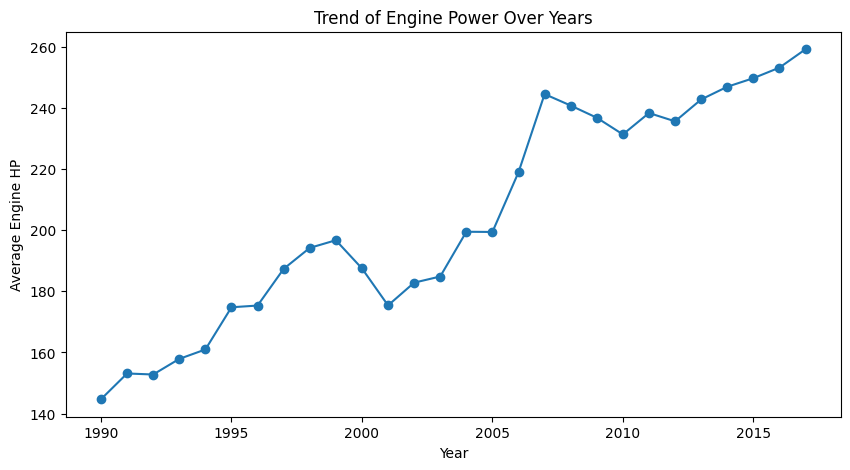

In [27]:
#  Engine Power Trend
plt.figure(figsize=(10,5))
plt.plot(year_summary.index, year_summary['Engine HP'], marker = 'o')
plt.title('Trend of Engine Power Over Years')
plt.xlabel('Year')
plt.ylabel('Average Engine HP')
#plt.grid(True)

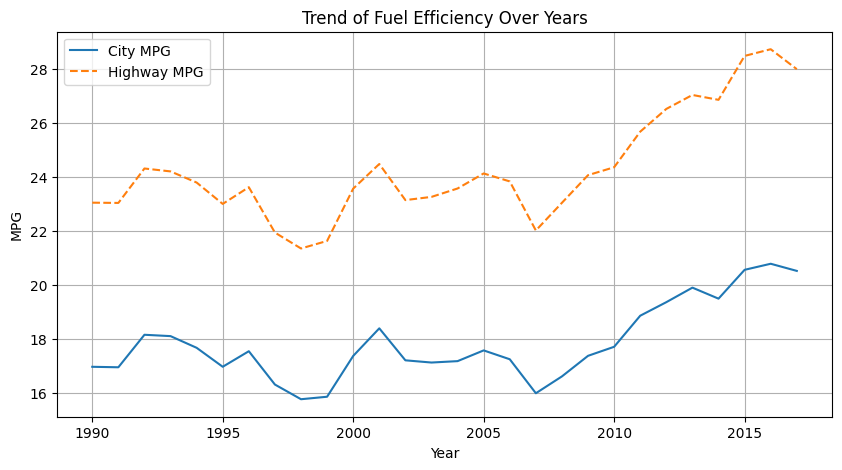

In [28]:
# Fuel Efficiency Trend
plt.figure(figsize=(10,5))
plt.plot(year_summary.index, year_summary['City MPG'], label = 'City MPG')
plt.plot(year_summary.index, year_summary['Highway MPG'], label = 'Highway MPG', linestyle = '--')
plt.title('Trend of Fuel Efficiency Over Years')
plt.xlabel('Year')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)

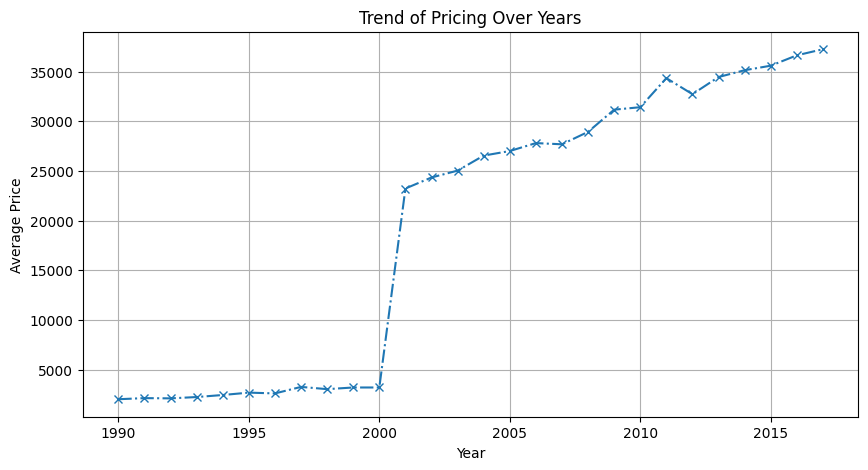

In [29]:
# Pricing Trend
plt.figure(figsize=(10,5))
plt.plot(year_summary.index, year_summary['Price'], marker = 'x', linestyle = '-.')
plt.title('Trend of Pricing Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
